# Web Scraping

From the book Automating the Boring Stuff with Python 

In this notebook, we are working with data that came with Colaboratory instead of the example files from the Book, because it's less trouble than if we try to import the files into the Colaboratory data folder.

## mapIt.py with the webbrowser Module

not feasible on Colaboratory Jupyter Notebook

## Downloading Files from the Web with the requests Module

## Parsing HTML with the bs4 Module

In [26]:
import bs4, requests
exampleFile = open('/content/sample_data/example.html')
exampleSoup = bs4.BeautifulSoup(exampleFile, 'html.parser') 
elems = exampleSoup.select('#author')
print(elems[0].getText())

Al Sweigart


In [27]:
type(elems) # elems is a list of Tag objects.

list

In [28]:
len(elems)

1

In [29]:
type(elems[0])

bs4.element.Tag

In [30]:
str(elems[0]) # The Tag object as a string.

'<span id="author">Al Sweigart</span>'

In [ ]:
elems[0].getText()

'Al Sweigart'

In [ ]:
elems[0].attrs

{'id': 'author'}

## Project: Opening All Search Results 

Googling...
<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>tokyo sushi fish culture - Google Search</title><script nonce="m3m5Agwxjtl3Bxocbm+K9w==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window
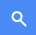
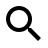

In [31]:
#! /usr/bin/python3
# lucky.py - Opens several Google search results.

import requests, sys, webbrowser, bs4, urllib

text = 'tokyo sushi fish culture'
text = urllib.parse.quote_plus(text)
url = 'https://google.com/search?q=' + text

print('Googling...') # display text while downloading the Google page
# res = requests.get('http://google.com/search?q=' + ' '.join(sys.argv[1:]))
res = requests.get(url)
res.raise_for_status()

# Retrieve top search result links.
soup = bs4.BeautifulSoup(res.text, 'lxml') #bs4.BeautifulSoup(res.text)

# Open a browser tab for each result.
linkElems = soup.select('div#main > div > div > div > a')

numOpen = min(5, len(linkElems))
for i in range(numOpen):
    print(linkElems[i].get('href'))
    print('-----')

for g in soup.find_all(class_='g'):
    print(g.text)
    

## Project: Downloading all XKCD Comics

In [1]:
# download_xkcd.py - Downloads every single XKCD comic.

import requests, os, bs4

url = 'http://xkcd.com'     #starting url
os.makedirs('xkcd', exist_ok=True)      # store comics in ./xkcd
while not url.endswith('#'):
    # TODO: Download the page
    print ('Downloading page %s...' % url)
    res = requests.get(url)
    res.raise_for_status()

    soup = bs4.BeautifulSoup(res.text)

    # TODO: Find the URL of the comic image.
    comic_elem = soup.select('#comic img')
    if comic_elem == []:
        print('Could not find comic image.')
    else:
        comic_url = 'http:' + comic_elem[0].get('src')
        # TODO: Download the image.
        print('Downloading image %s...' % (comic_url))
        res = requests.get(comic_url)
        res.raise_for_status()

    # TODO: Save the image to ./xkcd.
    image_file = open(os.path.join('xkcd', os.path.basename(comic_url)), 'wb')
    for chunk in res.iter_content(100000):
        image_file.write(chunk)
    image_file.close()

    # TODO: Get the Prev button's url.
    prev_link = soup.select('a[rel="prev"]')[0]
    url = 'http://xkcd.com' + prev_link.get('href')

print ('Done.')

Could not find comic image.


MissingSchema: ignored